In [93]:
from arcgis.gis import GIS
from IPython.display import HTML
import pandas as pd
import arcgis
from arcgis.raster.functions import apply
from IPython.display import Image

In [7]:
gis = GIS('http://tm.maps.arcgis.com', username="ricardo.castano")
print("ingresó")

Enter password: ········


In [12]:
landstar_item=gis.content.search('Multispectral Landsat','Imagery Layer',outside_org=True)

In [14]:
landstar_item

[<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>,
 <Item title:"MODIS True Color - Terra Corrected Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>,
 <Item title:"MDA NaturalVue Satellite Imagery" type:Imagery Layer owner:esri>,
 <Item title:"MODIS True Color - Aqua Corrected Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"MODIS True Color - Terra Surface Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>,
 <Item title:"Landsat test" type:Imagery Layer owner:kekenesri>,
 <Item title:"Landsat Arctic Views - Geology with DRA" type:Imagery Layer owner:esride_content>,
 <Item title:"Color Infrared Multi-spectral Image Service" type:Imagery Layer owner:boulw2_bpresponse>]

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
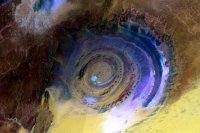

In [15]:
landstar_item[2]

In [26]:
landstar_item=landstar_item[2]

In [28]:
HTML(landstar_item.description)

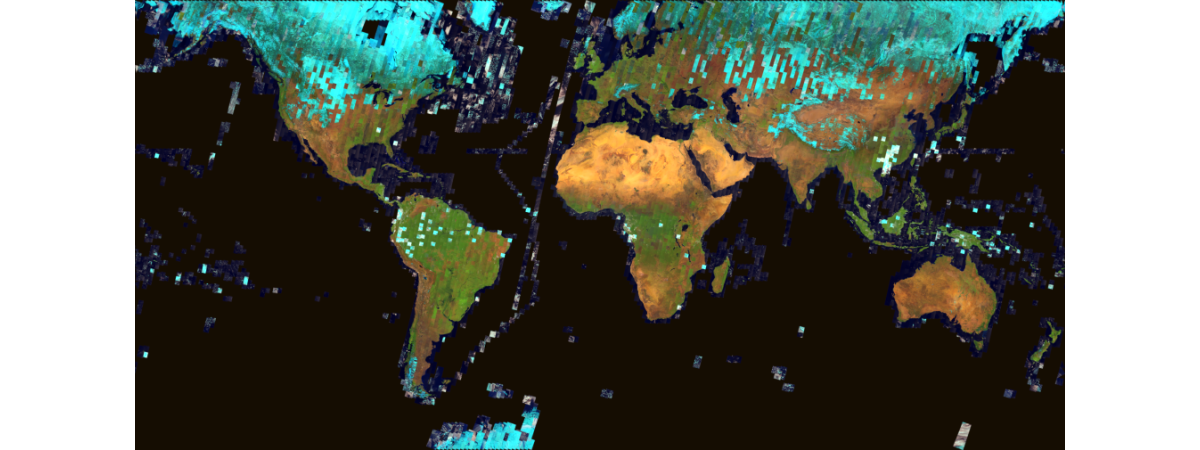

In [30]:
landstar_item.layers[0]

In [42]:
sat_mund=landstar_item.layers[0]

In [36]:
pd.DataFrame(sat_mund.key_properties()['BandProperties'])

BandName  WavelengthMin  WavelengthMax
0        CoastalAerosol            430            450
1                  Blue            450            510
2                 Green            530            590
3                   Red            640            670
4          NearInfrared            850            880
5   ShortWaveInfrared_1           1570           1650
6   ShortWaveInfrared_2           2110           2290
7                Cirrus           1360           1380
8                    QA              0              0
9      ThermalInfrared1          10600          11190
10     ThermalInfrared2          11500          12510

In [52]:
m=gis.map("Medellin, Colombia")
m.add_layer(sat_mund)
m

MapView(layout=Layout(height='400px', width='100%'))

In [43]:
for rasterfun in sat_mund.properties.rasterFunctionInfos:
    print(rasterfun.name)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


In [47]:
color_infrarojo=apply(sat_mund,'Color Infrared with DRA')
m1=gis.map('Medellin, Colombia')
m1.add_layer(color_infrarojo)
m1

MapView(layout=Layout(height='400px', width='100%'))

In [63]:
from arcgis.geocoding import geocode
m2=gis.map()
m2.basemap = "satellite"
m2.height ='650px'
location=geocode ("Cuartel General del Ejército, Jirón Paseo del Bosque, Sd. Ministerio De Guerra (Cuartel General Del Ejercito), San Borja, Lima, 15037, PER")[0]
m2.extent = location['extent']
m2.zoom=15
m2

MapView(layout=Layout(height='400px', width='100%'), zoom=15.0)

In [64]:
m2.add_layer(color_infrarojo)

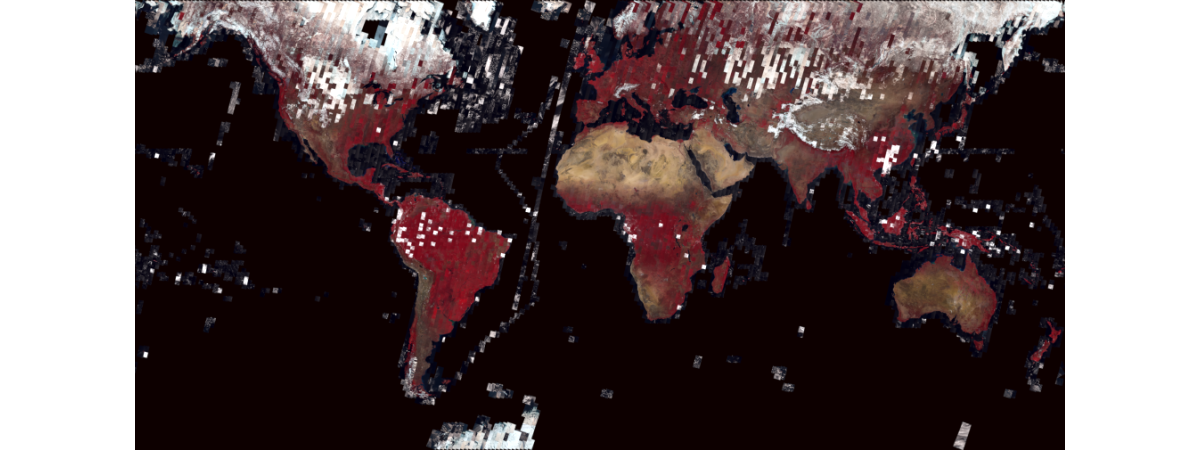

In [65]:
color_infrarojo

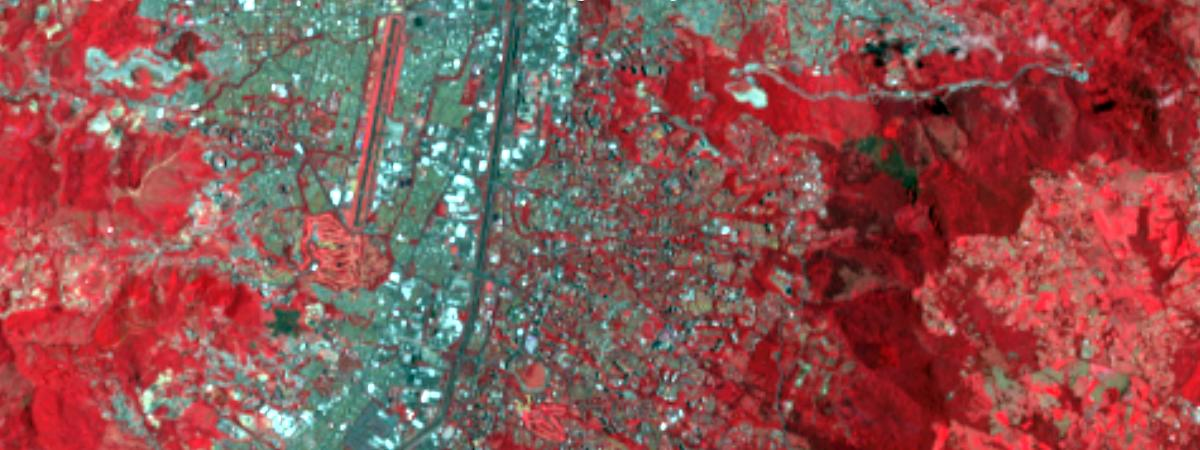

In [75]:
area = geocode('el Poblado, medellin, Colombia', out_sr=sat_mund.properties.spatialReference)[0]
color_infrarojo.extent =area ['extent']
color_infrarojo

In [77]:
guar_img =sat_mund.export_image(bbox=area['extent'],size=[1200,450],f='image',save_folder='.',save_file='elploblado.jpg')
guar_img

'.\\elploblado.jpg'

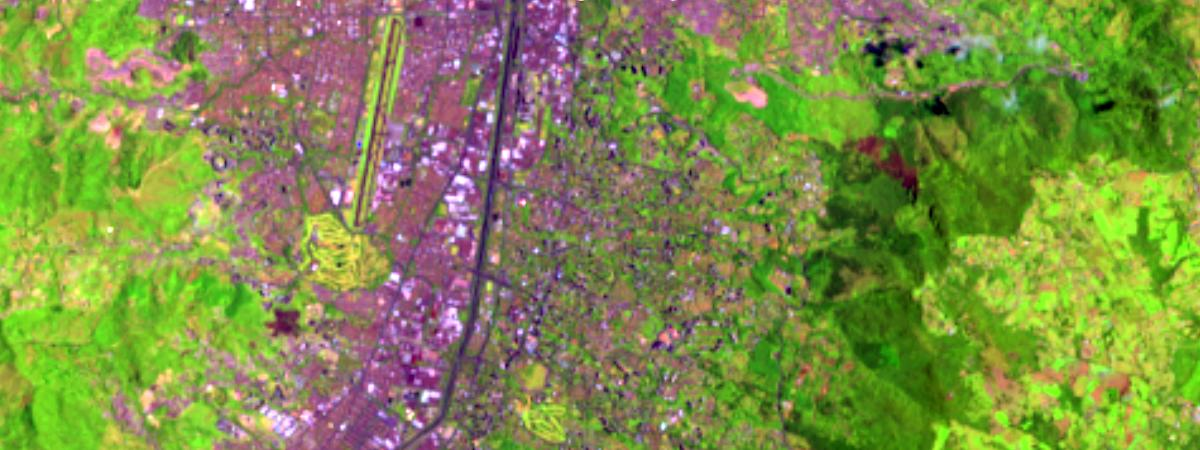

In [79]:
Image(filename=guar_img,width=1200,height=450)

# Cool

In [80]:
from arcgis.geometry import Geometry, buffer

In [82]:
ply =buffer(geometries=[Geometry(area['location'])],
           in_sr=102100,distances=6000,unit='esriMeters')[0]

In [83]:
from arcgis.raster.functions import clip

In [85]:
redclib =clip(sat_mund, ply)
m3=gis.map("El Poblado, Medellin, Colombia")
m3

MapView(layout=Layout(height='400px', width='100%'))

In [86]:
 m3.add_layer(redclib)

# Posibles
- Comapracion de imagenes en 2 fechas
- Sobreposicion de analisis raster